# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Analiza głównych składowyn (PCA)

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

Mamy zestaw danych będący 40 punktami na płaszczyźnie $(x_i,y_i).$

In [2]:
X = np.empty((40,2))
X[:,0] = np.linspace(-1,1,40)+ np.random.randn(40)*0.1
X[:,1] = 1.1*X[:,0] + np.random.randn(40)*0.2
print(X)

[[-0.90808838 -1.04597281]
 [-0.63930401 -0.85900663]
 [-0.97384352 -0.91573135]
 [-0.74723503 -0.74330901]
 [-0.99058903 -1.24518619]
 [-0.85453977 -0.67111188]
 [-0.62012528 -0.62224413]
 [-0.60565796 -0.9321748 ]
 [-0.50895355 -0.47761613]
 [-0.65030898 -0.51404501]
 [-0.54653435 -0.55284267]
 [-0.45532911 -0.93885596]
 [-0.33336579 -0.40126841]
 [-0.40147363 -0.31513206]
 [-0.30524248 -0.63412907]
 [-0.18490565 -0.41257569]
 [-0.35069729 -0.61545577]
 [-0.21992348 -0.2043814 ]
 [ 0.07344963 -0.16945026]
 [ 0.01121148  0.16164246]
 [ 0.24865484  0.19641624]
 [ 0.03857313 -0.22985183]
 [ 0.06538648  0.0095542 ]
 [ 0.25357389  0.23619952]
 [ 0.11875643 -0.10565125]
 [ 0.44094424  0.33080518]
 [ 0.33197322  0.33230715]
 [ 0.39943655  0.28523346]
 [ 0.49987832  0.49555326]
 [ 0.38396123  0.20462551]
 [ 0.58794075  0.68241159]
 [ 0.67926349  0.96620749]
 [ 0.55775793  0.88679963]
 [ 0.64118658  0.50078932]
 [ 0.70665716  0.52362636]
 [ 0.69192082  0.97653887]
 [ 0.81844514  1.26270707]
 

## Wstęp


### Macierz kowariancji

  $$ C_{ij} = \frac{1}{N-1}\sum_{k=1}^N{ X_{ki} X_{kj}}$$

###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.cov`.

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()
C = np.cov(X.T)

In [4]:
assert C.shape == (2,2)


###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.mean` `np.sum`

In [5]:
def kowariancja(X):
    m = np.mean(X,axis=0)
    C = 1/(X.shape[0]-1)*np.dot( (X-m).T,X-m)
    return C

In [6]:
np.testing.assert_almost_equal(kowariancja(X), np.cov(X.T))

import inspect
blacklist = ["cov","corrcoef"]
assert all([ not keyword  in inspect.getsource(kowariancja) for keyword in blacklist])

### Wartości i wektory własne

Narysujmy dane


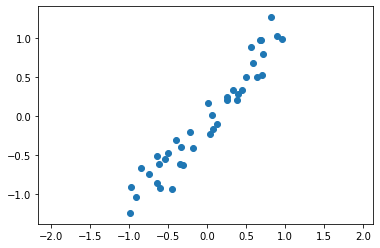

In [7]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0],X[:,1])

### Zagadnienie własne

Szukamy takich liczb $\lambda_i$ i wektorów $x_i$ by zachodziło:
$$ C x_i = \lambda_i x_i $$


W numpy mamy gotową funkcję obliczającą liczby $\lambda_i$ i wektory $x_i$:

In [8]:
val, ev =  np.linalg.eig(C)


### Sprawdźmy rachunkiem równanie własne:

Niech `lam` będzie wartością własną a `vec` wektorem:

In [9]:
lam = None
vec = None

# YOUR CODE HERE
# raise NotImplementedError()
lam = val[1]
vec = ev[:,1]

To zachodzi:
    
`np.dot(C,vec) == lam*vec`

In [10]:
np.testing.assert_allclose(np.dot(C,vec), lam*vec)
assert abs(lam)>1e-6

Dodajmy na rysunku wektory własne:

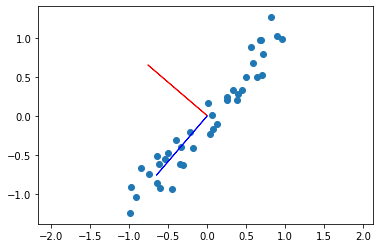

In [11]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0],X[:,1])

plt.arrow(0,0,ev[0,0],ev[1,0],color='r')
plt.arrow(0,0,ev[0,1],ev[1,1],color='b')

Sprawdźmy jeszcze,  że wektory własne odpowiadające różnym wartościom własnym są ortogonalne.
    
    

In [12]:
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,0]), 1)
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,1]), 0)

## Implementacja PCA krok po kroku

Wykonamy redukcję PCA 13 wymiarowego  zestawu do przestrzeni 3d


Referencyjną implementacją będzie `sklearn.decomposition.PCA`.

Niech:

  - `Xorig`  - dane orginalne (przed PCA)
  - `X` - dane w zredukowanej przestrzeni

Zaimplementujemy taką samą operację konstruując operator rzutowania z 13 do 3 wymiarów z trzech wektorów własnych macierzy kowariancji. Wektory wybierzemy kierując się tym by odpowiadały one największym wartościom własnym.



In [13]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X,y  = datasets.load_wine(return_X_y=True)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = decomposition.PCA(n_components=3)
pca.fit(X)

Xorig = X.copy()
X = pca.transform(X)

In [14]:
Xorig.shape,"->", X.shape

((178, 13), '->', (178, 3))

### Krok 1: oblicz macierz kowariancji

In [15]:
C = None
# YOUR CODE HERE
# raise NotImplementedError()
C = np.cov(Xorig.T)

In [16]:
np.testing.assert_approx_equal(C[11,2],0.0039333279)
np.testing.assert_almost_equal(C,np.cov(Xorig.T))

### Krok 2:  Wektory i wartości własne macierzy kowariancji. 

Rozwiązujemy numerycznie zagadnienie własne macierzy $C$:

In [17]:
val, ev =  np.linalg.eig(C)

**Posortuj** wartości i odpowiadające im wektory własne od największej do najmniejszej wartości własnej.

*warto rozważyć zastosowanie* `np.argsort`.

In [20]:
# YOUR CODE HERE
# raise NotImplementedError()
val, ev =  np.linalg.eig(C)

Pierwsze trzy wartości własne powinny być takie same jak liczby w atrybucie `pca.explained_variance_`

In [21]:
np.testing.assert_allclose(val[-1],0.1039619918207, rtol=1e-5)
np.testing.assert_allclose(pca.explained_variance_, val[:3], rtol=1e-5)

AssertionError: 
Not equal to tolerance rtol=1e-05, atol=0

Mismatch: 100%
Max absolute difference: 0.14835802
Max relative difference: 1.42704094
 x: array(0.25232)
 y: array(0.103962)

### Krok 3: Stwórz macierz operatora rzutowania z przestrzeni 13d w  3d

Mając jeden znormalizowany wektor własny (13 liczb), iloczyn skalarny tego wektora przez dowolny inny wektor tej samej przestrzeni (13d) można zinterpretować jako rzutowanie. Chcemy rzutować na pierwsze trzy wektory własne - można więc przedstawić to jako operację liniową z macierzą $(13,3)$


Macierz taka składa się z trzech 13 elementowych kolumn, będących wartościami własnymi macierzy kowariancji.

In [ ]:
P = None 
# YOUR CODE HERE
# raise NotImplementedError()
P = ev[:,:3]

In [ ]:
P.shape

W sklearn mamy taką macierz w atrybucie `pca.components_`:

In [ ]:
pca.components_

Sprawdźmy czy otrzymamy te same wyniki:

In [ ]:
np.testing.assert_almost_equal(np.abs(P.T),np.abs(pca.components_))

### Krok 4: Wykonaj rzutowanie wszytkich  danych z 13d do 3d.

Najpierw dla sprawdzenia wykonamy rzutowanie jeden punkt z 13d do 3d (np. z indeksem  12)

In [ ]:
print(Xorig[12])

In [ ]:
x12 = None 

# YOUR CODE HERE
# raise NotImplementedError()
x12 = np.dot(Xorig[12],P)

In [ ]:
print(x12)

In [ ]:
x12.shape = (3,)
np.testing.assert_almost_equal(np.abs(x12), np.abs([-2.11346234,  0.67570634, -0.86508643]))

Możemy teraz wykonać rzutowanie dla wszystkich danych. 

In [ ]:
X_3d= None

# YOUR CODE HERE
# raise NotImplementedError()
X_3d= np.dot(Xorig,P)

In [ ]:
X_3d.shape  == (Xorig.shape[0],3)

np.testing.assert_allclose(np.abs(X_3d[:4]),np.abs([[-3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [-2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [-2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [-3.75706561e+00,  2.75637191e+00, -1.76191842e-01]]), rtol=1e-5 )

Ostatecznie wektor w zredukowanej przestrzeni obliczony przez nas i wektor obliczony przez sklear są takie same.

In [ ]:
np.testing.assert_allclose(np.abs(X_3d),np.abs(X), rtol=1e-5)